# 🔍 Feature Descriptions

- **gender**: Gender of the individual (`Male`, `Female`, etc.).
- **age**: Age in years (numeric).
- **hypertension**: Whether the person has high blood pressure (`0`: No, `1`: Yes).
- **heart_disease**: Whether the person has heart disease (`0`: No, `1`: Yes).
- **smoking_history**: Smoking behavior history (`never`, `current`, `former`, `No Info`, etc.).
- **bmi**: Body Mass Index — an estimate of body fat.
- **HbA1c_level**: Hemoglobin A1c level — reflects average blood sugar over past 2–3 months.
- **blood_glucose_level**: Current blood glucose level (mg/dL).
- **diabetes**: Target variable indicating diabetes status (`0`: No, `1`: Yes).

link for data :  https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data

# download dataset and  data understanding

In [657]:
from logging import warning
warning('ignore')


In [631]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import numpy as np
import pickle
style.use('tableau-colorblind10')
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")
file_path = os.path.join(path, 'diabetes_prediction_dataset.csv')
df = pd.read_csv(file_path)

In [635]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [637]:
duplicate_rows_data = df[df.duplicated()]
duplicate_rows_data.shape

(3854, 9)

In [639]:
df=df.drop_duplicates()

In [640]:
df.drop(df[df['gender']=='Other'].index,inplace=True)

In [641]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [642]:
df['gender'].value_counts()

,count
gender,
Female,56161
Male,39967


In [420]:
df['hypertension'].value_counts()

,count
hypertension,
0,88667
1,7461


In [421]:
df['heart_disease'].value_counts()

,count
heart_disease,
0,92205
1,3923


In [422]:
df['smoking_history'].value_counts()

,count
smoking_history,
never,34395
No Info,32881
former,9299
current,9197
not current,6359
ever,3997


In [423]:
df['diabetes'].value_counts()

,count
diabetes,
0,87646
1,8482


# EDA

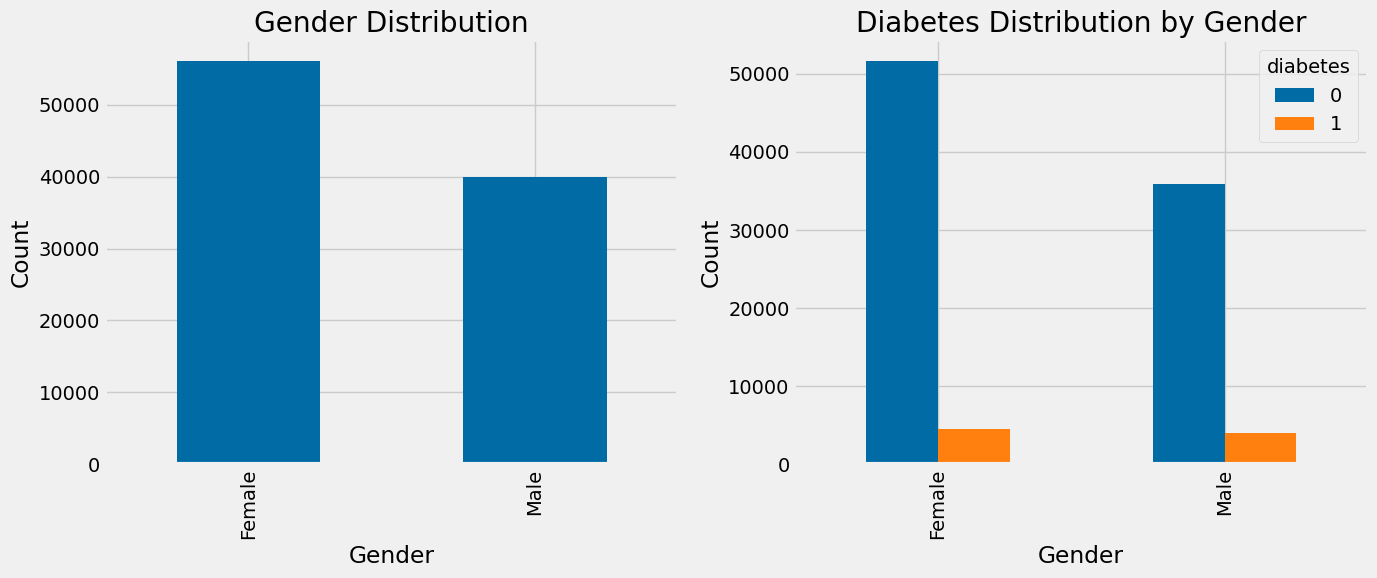

In [643]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


df['gender'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')


df.groupby('gender')['diabetes'].value_counts().unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('Diabetes Distribution by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')


plt.tight_layout()


plt.show()

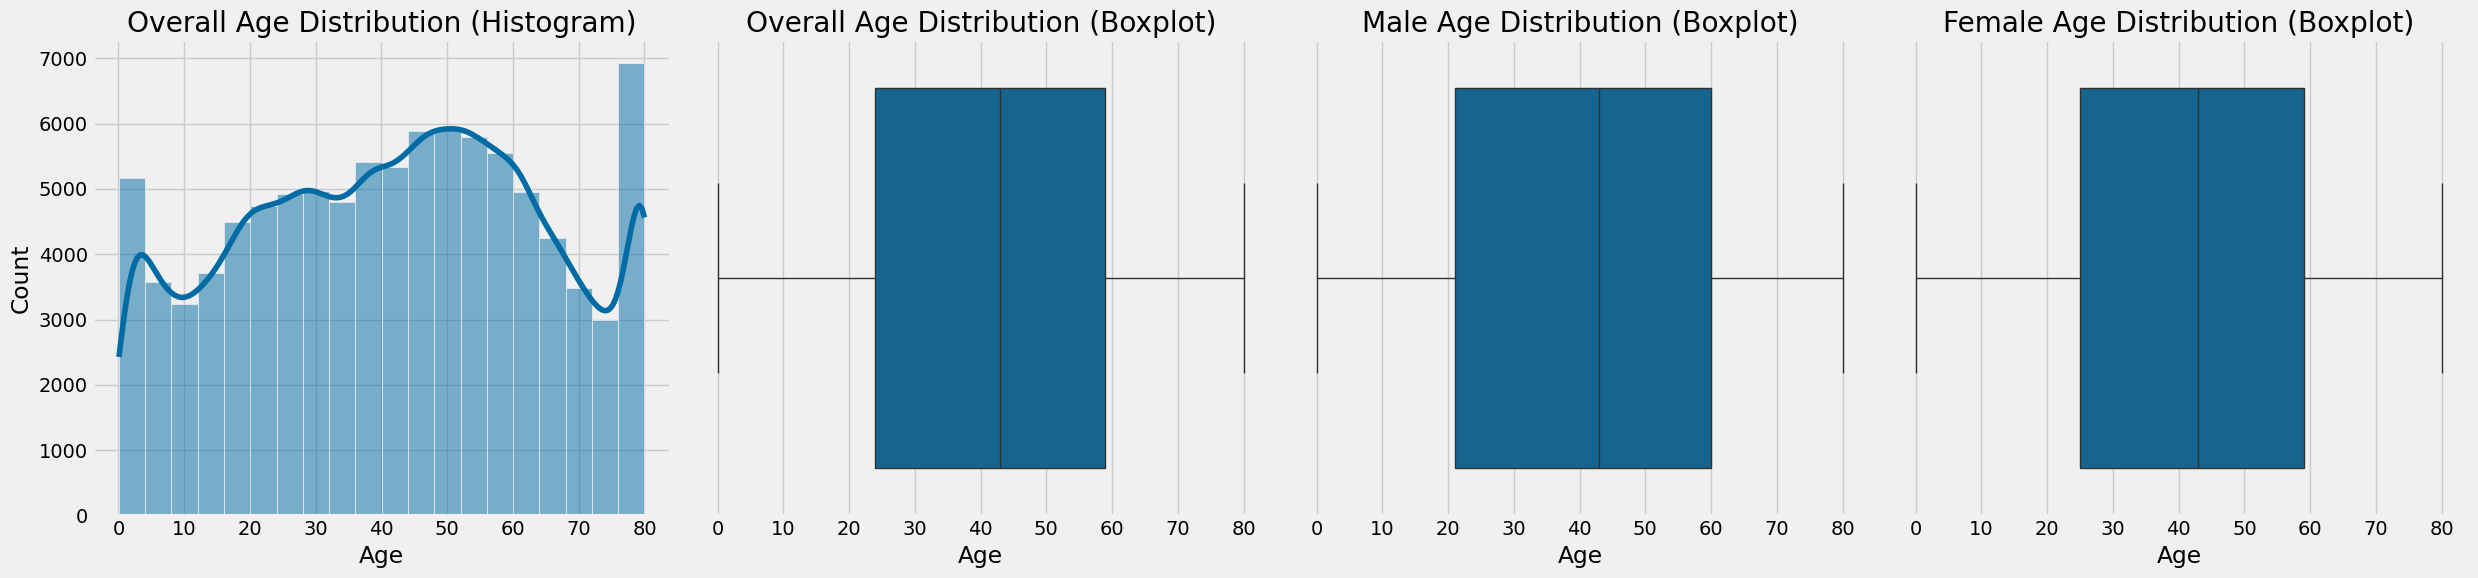

In [425]:
fig, axes = plt.subplots(1, 4, figsize=(25, 6))


sns.histplot(df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Overall Age Distribution (Histogram)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')


sns.boxplot(x='age', data=df, ax=axes[1])
axes[1].set_title('Overall Age Distribution (Boxplot)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('')


sns.boxplot(x='age', data=df[df['gender'] == 'Male'], ax=axes[2])
axes[2].set_title('Male Age Distribution (Boxplot)')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('')


sns.boxplot(x='age', data=df[df['gender'] == 'Female'], ax=axes[3])
axes[3].set_title('Female Age Distribution (Boxplot)')
axes[3].set_xlabel('Age')
axes[3].set_ylabel('')


plt.tight_layout()
plt.show()

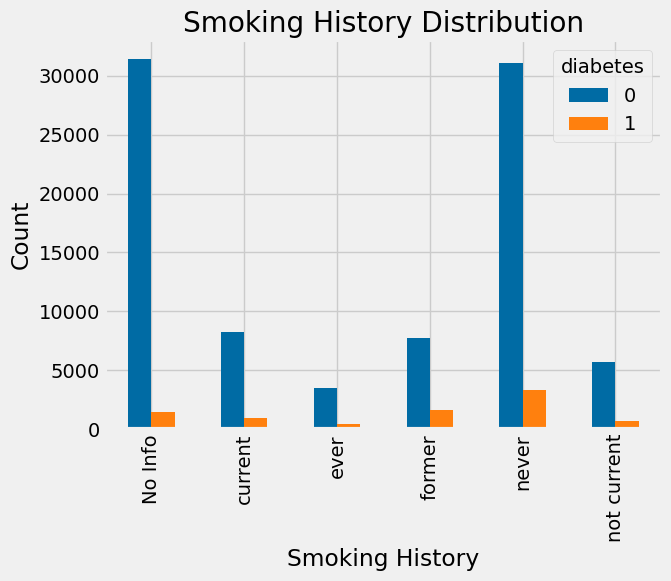

In [427]:
df.groupby('smoking_history')['diabetes'].value_counts().sort_index().unstack().plot(kind='bar')
plt.title('Smoking History Distribution')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

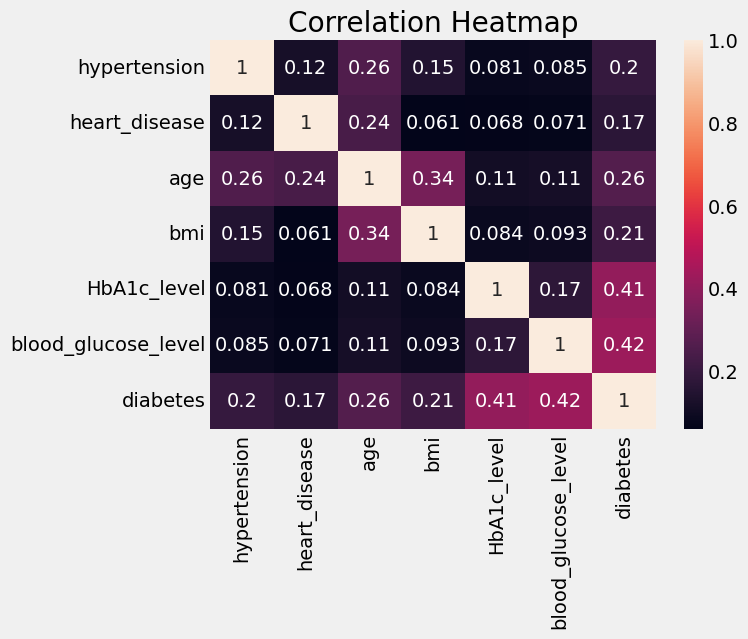

In [428]:
sns.heatmap(df[['hypertension','heart_disease','age','bmi','HbA1c_level','blood_glucose_level','diabetes']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

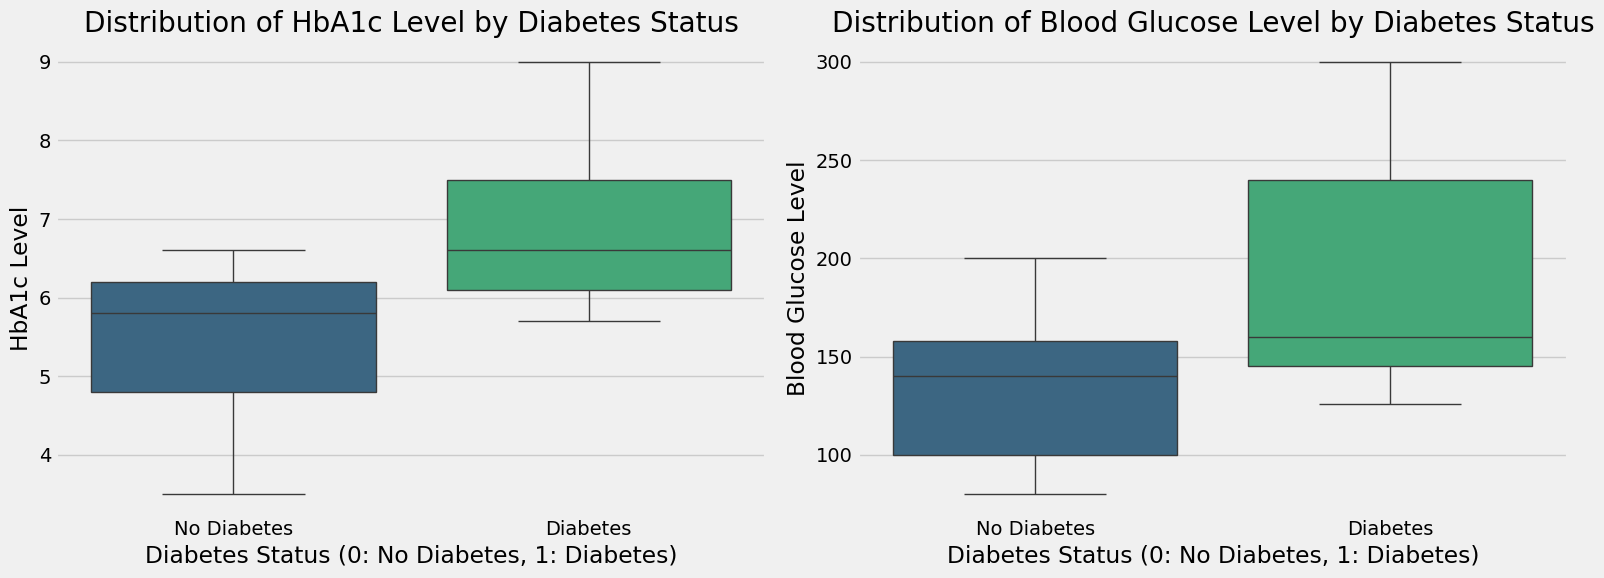

In [662]:

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, hue='diabetes', palette='viridis', legend=False)
plt.title('Distribution of HbA1c Level by Diabetes Status')
plt.xlabel('Diabetes Status (0: No Diabetes, 1: Diabetes)')
plt.ylabel('HbA1c Level')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.subplot(1, 2, 2)
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, hue='diabetes', palette='viridis', legend=False)
plt.title('Distribution of Blood Glucose Level by Diabetes Status')
plt.xlabel('Diabetes Status (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Blood Glucose Level')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

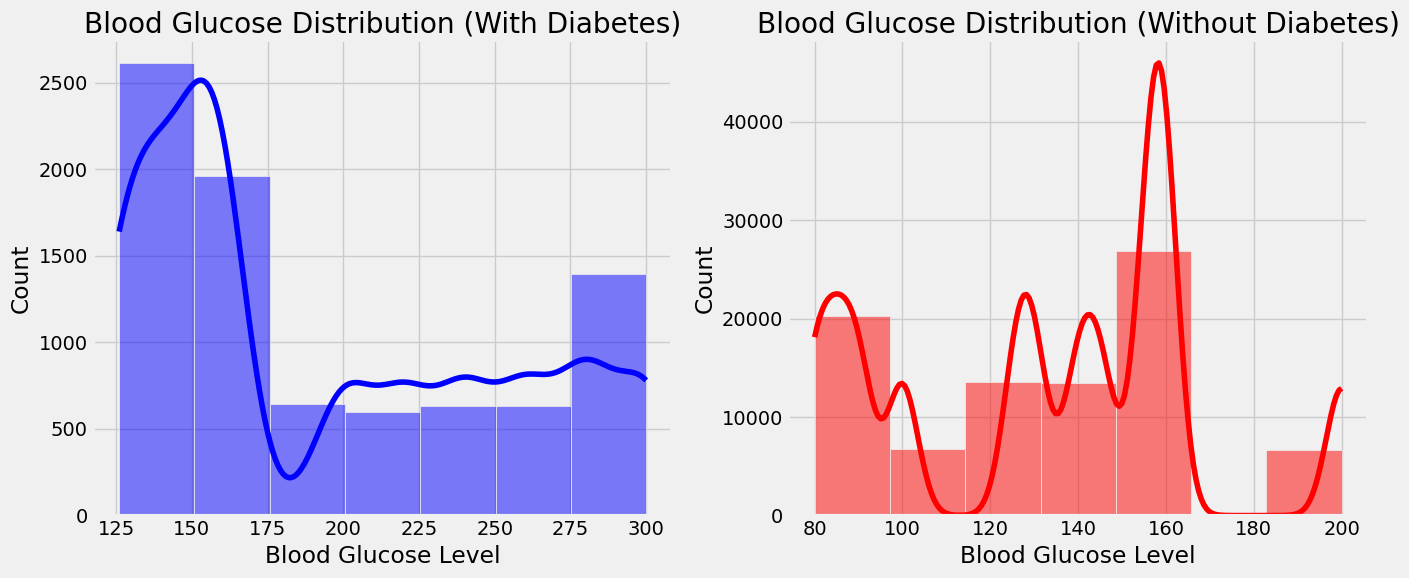

In [663]:
df_with_diabetes = df[(df['diabetes'] == 1)]
df_without_diabetes = df[(df['diabetes'] == 0)]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_with_diabetes['blood_glucose_level'], bins=7, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Blood Glucose Distribution (With Diabetes)')
axes[0].set_xlabel('Blood Glucose Level')
axes[0].set_ylabel('Count')
sns.histplot(df_without_diabetes['blood_glucose_level'], bins=7, kde=True, ax=axes[1], color='red')
axes[1].set_title('Blood Glucose Distribution (Without Diabetes)')
axes[1].set_xlabel('Blood Glucose Level')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

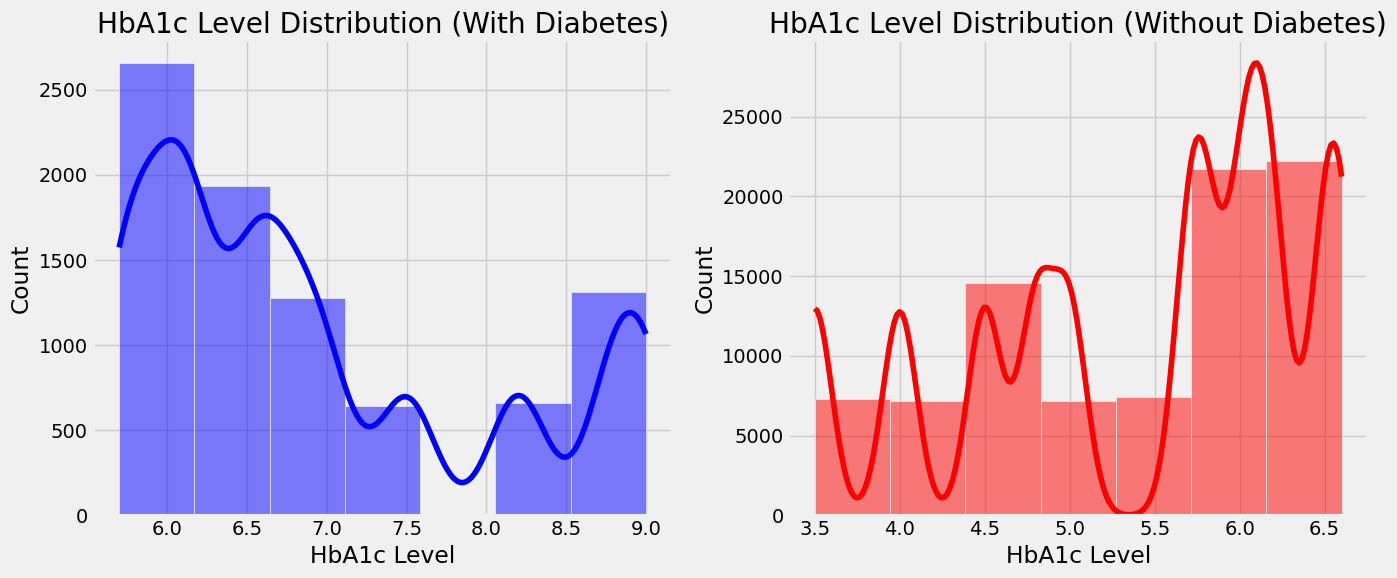

In [664]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_with_diabetes['HbA1c_level'], bins=7, kde=True, ax=axes[0], color='blue')
axes[0].set_title('HbA1c Level Distribution (With Diabetes)')
axes[0].set_xlabel('HbA1c Level')
axes[0].set_ylabel('Count')

sns.histplot(df_without_diabetes['HbA1c_level'], bins=7, kde=True, ax=axes[1], color='red')
axes[1].set_title('HbA1c Level Distribution (Without Diabetes)')
axes[1].set_xlabel('HbA1c Level')
axes[1].set_ylabel('Count')


plt.tight_layout()
plt.show()

#preprocessing parameter

###handle smoking_history


In [665]:
df['smoking_history'].value_counts()

,count
smoking_history,
never,34395
No Info,32881
former,9299
current,9197
not current,6359
ever,3997


In [666]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never']:
        return 'non-smoker'
    elif smoking_status == 'No Info':
        return 'No Info'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)
df['smoking_history'].value_counts()

,count
smoking_history,
non-smoker,34395
No Info,32881
past_smoker,19655
current,9197


In [667]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

df_copy = df.copy()
le = LabelEncoder()
df_copy['smoking_history_encoded'] = le.fit_transform(df_copy['smoking_history'])

In [668]:
le.classes_

array(['No Info', 'current', 'non-smoker', 'past_smoker'], dtype=object)

In [669]:
df_copy['smoking_history_encoded']=df_copy['smoking_history_encoded'].replace(0,np.nan)

In [670]:
df_copy['smoking_history_encoded'].value_counts()

,count
smoking_history_encoded,
2.0,34395
3.0,19655
1.0,9197


In [671]:
df_copy=df_copy.drop(['smoking_history','gender'],axis=1)
imputer = KNNImputer(n_neighbors=5,)
df_imputed = imputer.fit_transform(df_copy)
df_copy = pd.DataFrame(df_imputed, columns=df_copy.columns)

In [673]:
df_copy.isna().sum()

,0
age,0
hypertension,0
heart_disease,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0
smoking_history_encoded,0


In [674]:
df_copy['smoking_history_encoded'].round().astype(int).value_counts()

,count
smoking_history_encoded,
2,63437
3,23150
1,9541


In [676]:
df['smoking_history']=pd.Series(le.inverse_transform((df_copy['smoking_history_encoded']+0.5).astype(int)))

In [677]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,3602
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [678]:
df.dropna(inplace=True)

### handle unbalanced data


In [694]:
from sklearn.utils import resample
min=df[df['diabetes']==1]
maj=df[df['diabetes']==0]

df_maj_upsampled = resample(maj,
                                 replace=True,    # sample with replacement
                                 n_samples= 8482, # to match majority class
                                 random_state=42)
df_upsampled = pd.concat([df_maj_upsampled, min])

df_upsampled.reset_index(drop=True, inplace=True)


In [695]:
x=df_upsampled.drop('diabetes',axis=1)
y=df_upsampled['diabetes']

##split the data and  standriaztion and handle cat values


In [696]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [697]:
x_train['smoking_history'].value_counts()

,count
smoking_history,
non-smoker,8778
past_smoker,3206
current,1326


In [699]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ],
    remainder='passthrough'
)


pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

ValueError: Specifying the columns using strings is only supported for dataframes.

## model training and parameter tuning and evalution

In [700]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [701]:
print(accuracy_score(y_test,y_pred))

0.8921274038461539


In [702]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1689
           1       0.89      0.89      0.89      1639

    accuracy                           0.89      3328
   macro avg       0.89      0.89      0.89      3328
weighted avg       0.89      0.89      0.89      3328



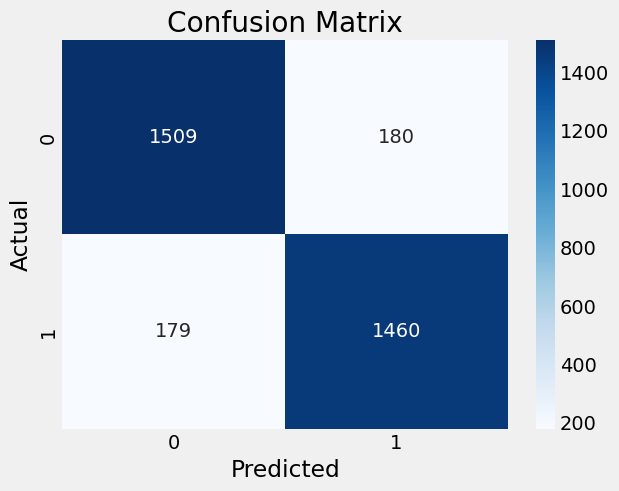

In [703]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [709]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [710]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1689
           1       0.90      0.91      0.91      1639

    accuracy                           0.91      3328
   macro avg       0.91      0.91      0.91      3328
weighted avg       0.91      0.91      0.91      3328



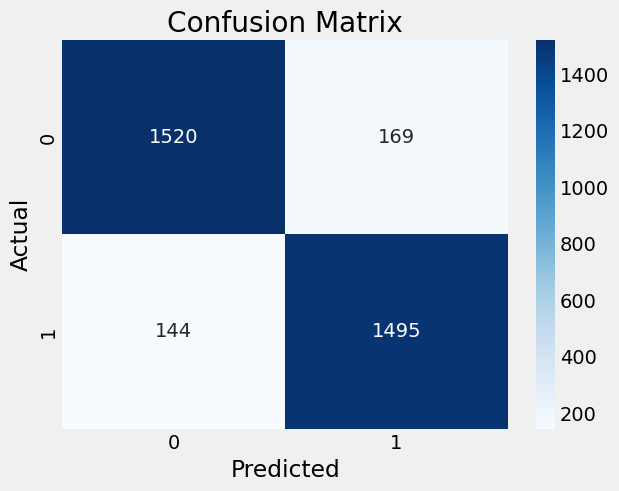

In [711]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [712]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [713]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1689
           1       0.88      0.89      0.89      1639

    accuracy                           0.89      3328
   macro avg       0.89      0.89      0.89      3328
weighted avg       0.89      0.89      0.89      3328



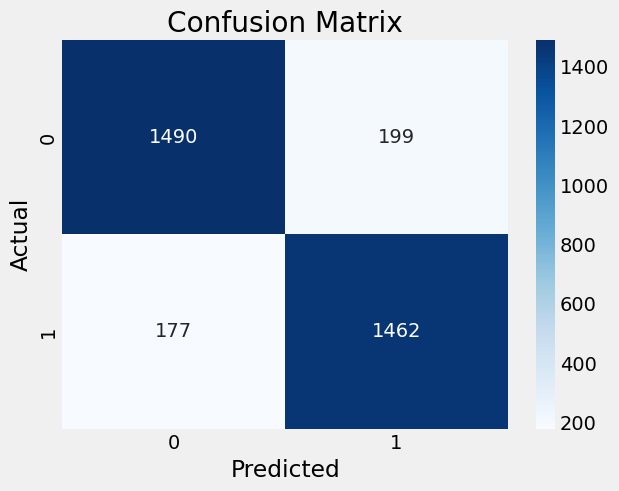

In [714]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [715]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [716]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1689
           1       0.88      0.90      0.89      1639

    accuracy                           0.89      3328
   macro avg       0.89      0.89      0.89      3328
weighted avg       0.89      0.89      0.89      3328



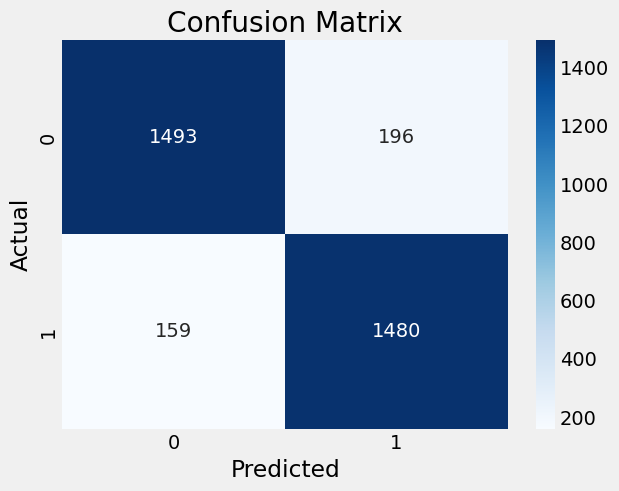

In [717]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# hyper parameter tuning

In [718]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':[10,50,100],
                                                                 'max_depth':[None,10],
                                                                 'min_samples_split':[2,5],
                                                                 'min_samples_leaf':[1,2,4]},
                  cv=5,scoring='recall')
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 50, 100]},
             scoring='recall')

In [719]:
y_pred=grid.predict(x_test)

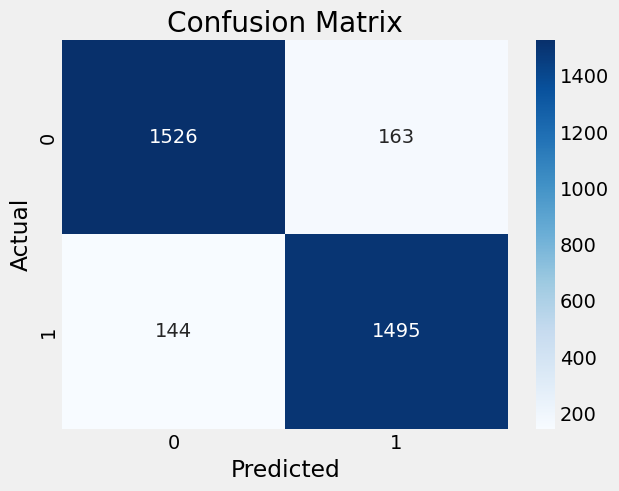

In [720]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [607]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1689
           1       0.90      0.93      0.91      1639

    accuracy                           0.91      3328
   macro avg       0.91      0.91      0.91      3328
weighted avg       0.91      0.91      0.91      3328



# save the model and preprocessor

In [721]:
with open('model.pkl', 'wb') as file:
    pickle.dump(grid, file)
with open('fitted_preprocessor.pkl', 'wb') as file:
    pickle.dump(pipeline, file)